In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [52]:
review_data = pd.read_csv('data/Reviews.csv')

In [53]:
review_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


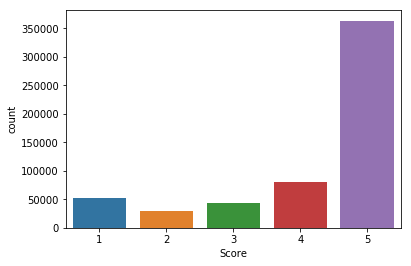

In [4]:
sns.countplot(review_data['Score'])

In [54]:
review_data = review_data[review_data.Score != 3]

In [55]:
review_data = review_data.sample(n=10000)

In [56]:
review_data.dropna(inplace=True)

In [57]:
X = review_data[['Summary','Text']]
y = review_data['Score']

In [58]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size =0.33,random_state=12)

In [77]:
class AmazonFoodReview:
    def __init__(self,classifiers):
        self.classifiers = classifiers
        
    def datapreparation(self):
        mapper = DataFrameMapper([('Summary',[CountVectorizer(stop_words='english'),
                                              TfidfTransformer()]),
                                 ('Text',[CountVectorizer(stop_words='english'),
                                          TfidfTransformer()])])
        self.pipelines = []
        for classifier in self.classifiers:
                pipeline = Pipeline([('mapper',mapper),
                            ('select',SelectKBest(k=1000)),
                            ('clf',classifier)])
                self.pipelines.append(pipeline)
        print('data preparation done...')
    def training(self,trainX,trainY):
        for pipeline in self.pipelines:
            pipeline.fit(trainX,trainY)
        print('I am done with training....')
            
    def testing(self,testX,testY):
        self.scores = []
        for pipeline in self.pipelines:
            self.scores.append(pipeline.score(testX,testY))
        return self.scores

In [78]:
classifiers = [LogisticRegression(),GaussianNB(),
              MultinomialNB(),RandomForestClassifier()]

In [79]:
amazonreview = AmazonFoodReview(classifiers)

In [80]:
amazonreview.datapreparation()

data preparation done...


In [81]:
amazonreview.training(Xtrain[['Summary','Text']],ytrain)

I am done with training....


In [83]:
scores=amazonreview.testing(Xtest,ytest)
print(scores)

[0.72969696969696973, 0.25878787878787879, 0.71727272727272728, 0.71272727272727276]
